<a href="https://colab.research.google.com/github/Roya62/sentiment-analysis/blob/main/APPLE_sentiment_analysis_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install required libraries

!pip install tensorflow-text
!pip install tf-models-official
!pip install nltk

     |████████████████████████████████| 4.3 MB 8.4 MB/s 
     |████████████████████████████████| 1.6 MB 7.5 MB/s 
     |████████████████████████████████| 636 kB 59.4 MB/s 
     |████████████████████████████████| 37.1 MB 47 kB/s 
     |████████████████████████████████| 1.2 MB 38.7 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 679 kB 54.0 MB/s 
     |████████████████████████████████| 352 kB 56.9 MB/s 
     |████████████████████████████████| 99 kB 11.8 MB/s 
     |████████████████████████████████| 211 kB 60.2 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=ede2c3c1a073da4d63543514d33e5bdfc88777c19d990da217e7f04dc63ecdcb
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=7cdf26929fdf545426

In [ ]:
import string
import nltk
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('english')

class text_cleaner:
  def remove_punctuation(self, text):
    new_text = ''
    for char in text:
      if char in string.punctuation:
        new_text += ' '
      else:
        new_text += char

    return new_text

  def lowering(self, text):
    return text.lower()

  def remove_stopwords(self, text):
    text = text.split()
    text = ''.join([i + ' ' for i in text if i not in stopwords]).strip()
    return text

  def clean(self, text):
    text = self.remove_punctuation(text)
    text = self.lowering(text)
    # text = self.remove_stopwords(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%cd /content/drive/MyDrive
import pandas as pd

data = pd.read_csv('apple-twitter-sentiment-texts.csv', encoding='latin1')
data.columns = ['text','sentiment']
data = data.drop_duplicates().reset_index(drop=True)

/content/drive/MyDrive


In [ ]:
data.shape

(1624, 2)

In [ ]:
data.head(20)

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0
5,RT @JPDesloges: Apple Acted Unfairly In Suppre...,-1
6,Let's not forget that press effects stock @App...,0
7,Apple Inc. Deleted Songs From Rival Services F...,-1
8,@TeamCavuto @Apple They're staging a die in ar...,0
9,Happy Monday! My camera on my fancy @Apple #iP...,-1


In [ ]:
cleaner = text_cleaner()
data['text'] = data['text'].apply(lambda a:cleaner.clean(a))

In [ ]:
data.head(20)

,text,sentiment
0,wow yall needa step it up apple rt heynyla ...,-1
1,what happened to apple inc http t co fjex...,0
2,thank u apple i can now compile all of the pi...,1
3,the oddly uplifting story of the apple co foun...,0
4,apple can i exchange my iphone for a differen...,0
5,rt jpdesloges apple acted unfairly in suppre...,-1
6,let s not forget that press effects stock app...,0
7,apple inc deleted songs from rival services f...,-1
8,teamcavuto apple they re staging a die in ar...,0
9,happy monday my camera on my fancy apple ip...,-1


In [ ]:
data = data.sample(frac=1).reset_index(drop = True)

In [ ]:
import numpy as np

X = data['text'].values
y = data['sentiment'].values

new_y = []
for value in y:
  if value == -1:
    new_y.append([1,0,0])
  elif value== 0:
    new_y.append([0,1,0])
  else:
    new_y.append([0,0,1])

y = np.array(new_y)

n_folds = 5
inds = list(range(X.shape[0]))
test_inds = [inds[c * int(X.shape[0] / n_folds):(c+1) * int(X.shape[0] / n_folds)] for c in range(n_folds)]

In [ ]:
import os

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

tf.get_logger().setLevel('ERROR')

In [ ]:
bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1", trainable=True)

In [ ]:
# Model definition

def build_classifier_model():
  # Input layer 
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

  # Tokenizer layer 
  encoder_inputs = bert_preprocess_model(text_input)

  # Pretrained bert layer
  outputs = bert_model(encoder_inputs)

  # Get pooled output of bert
  net = outputs['pooled_output']

  net = tf.keras.layers.Dropout(0.3)(net)
  # Classification layer
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [ ]:
from sklearn.metrics import classification_report

checkpoint_path = "model.ckpt"

results = []
classification_reports = []
train_hists = []
predicts = []
tests = []

for c in range(len(test_inds)):

  tf.keras.backend.clear_session()
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor = 'val_accuracy',
                                                 verbose=0)
  
  es_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0, patience=2, verbose=0,
  mode='min', baseline=None, restore_best_weights=False)

  classifier_model = build_classifier_model()
  classifier_model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-4),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
  X_test = X[test_inds[c]]
  y_test = y[test_inds[c]]

  X_train = X[[i for i in inds if i not in test_inds[c]]]
  y_train = y[[i for i in inds if i not in test_inds[c]]]

  train_hist = classifier_model.fit(x = X_train,y=y_train,validation_split=0.2,
                                epochs=200,batch_size = 32, callbacks = [cp_callback, es_callback])
  
  train_hists.append(train_hist)
  classifier_model.load_weights(checkpoint_path)

  hist = classifier_model.evaluate(X_test, y_test)
  results.append(hist)

  predicted = classifier_model.predict(X_test)


  predicted = np.array(list(map(lambda a:[0 if i!=np.argmax(a) else 1 for i in range(3)], predicted)))
  classification_reports.append(classification_report(y_test, predicted))
  predicts.append(predicted)
  tests.append(y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
33/33 [==============================] - 11s 241ms/step - loss: 0.1435 - accuracy: 0.9510 - val_loss: 5.0434e-04 - val_accuracy: 1.0000
Epoch 2/200
33/33 [==============================] - 8s 232ms/step - loss: 0.0333 - accuracy: 0.9942 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/200
33/33 [==============================] - 8s 243ms/step - loss: 0.0095 - accuracy: 0.9990 - val_loss: 4.2580e-04 - val_accuracy: 1.0000
Epoch 4/200
33/33 [==============================] - 8s 232ms/step - loss: 0.0027 - accuracy: 0.9981 - val_loss: 7.1341e-04 - val_accuracy: 1.0000
Epoch 5/200
33/33 [==============================] - 8s 229ms/step - loss: 5.5536e-04 - accuracy: 1.0000 - val_loss: 1.7233e-04 - val_accuracy: 1.0000
Epoch 6/200
33/33 [==============================] - 8s 230ms/step - loss: 3.2538e-04 - accuracy: 1.0000 - val_loss: 1.3311e-04 - val_accuracy: 1.0000
Epoch 7/200
33/33 [==============================] - 8s 228ms/step - loss: 2.5402e-04 - accuracy: 1.0000 - val_lo

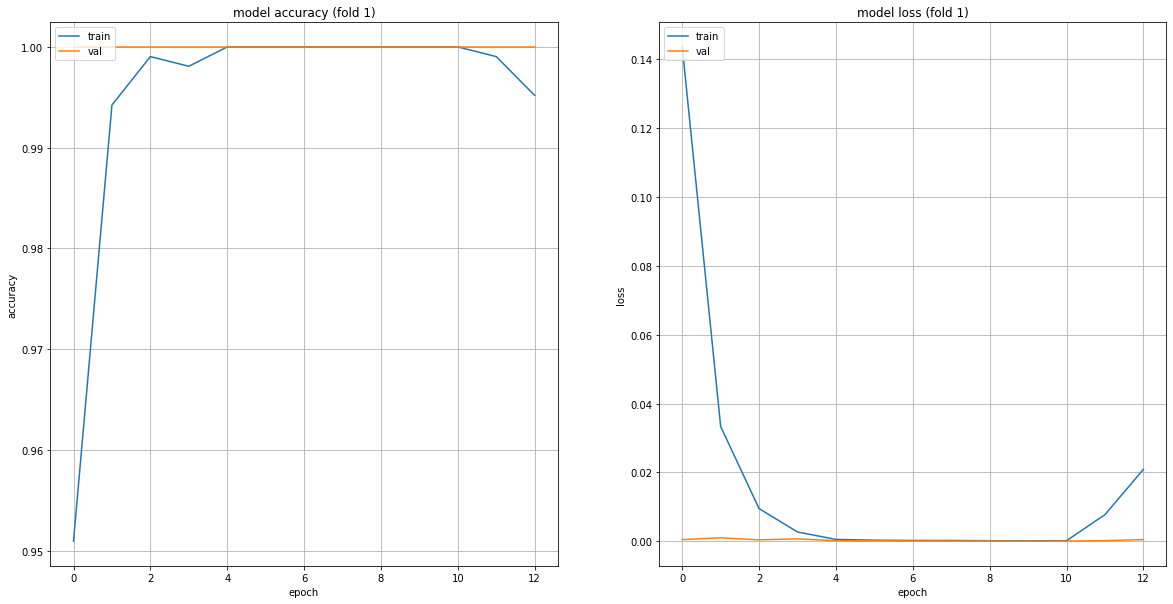

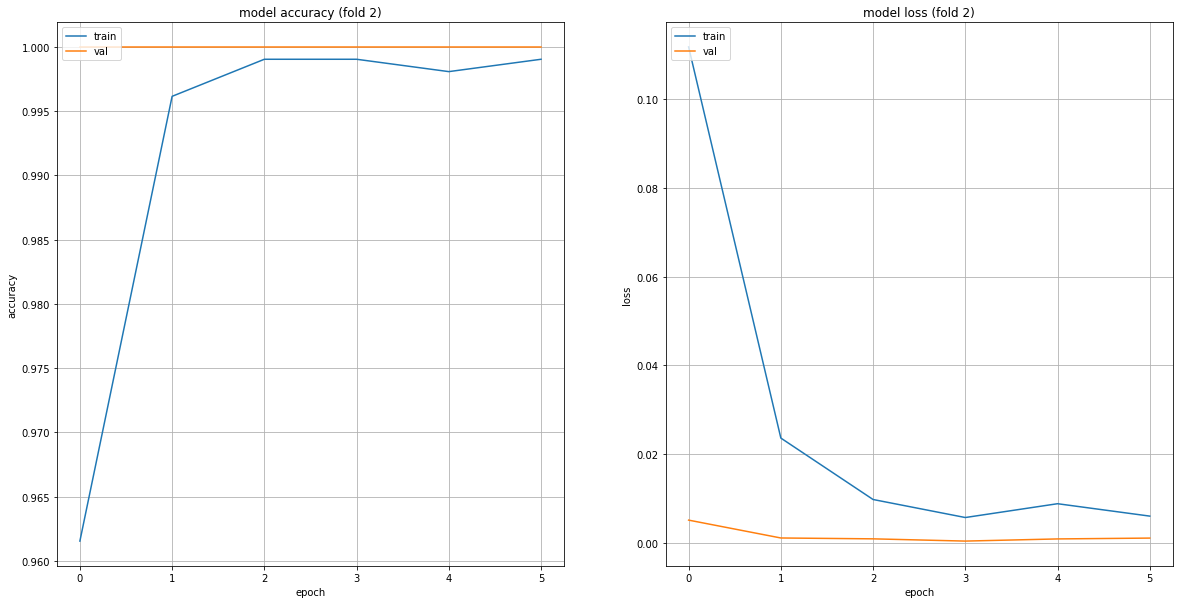

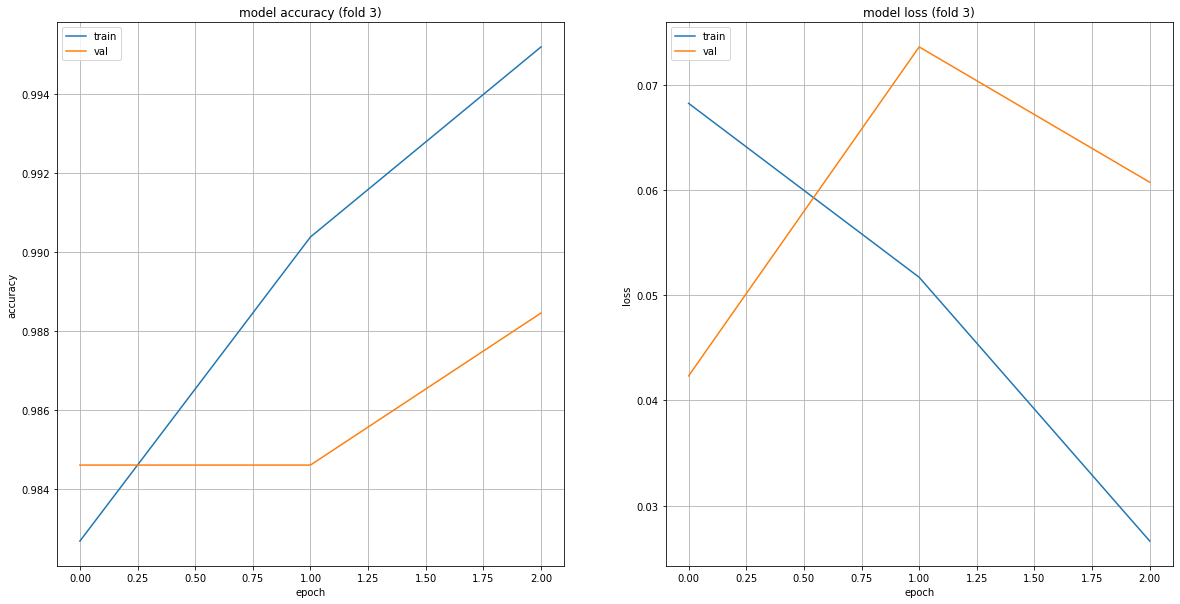

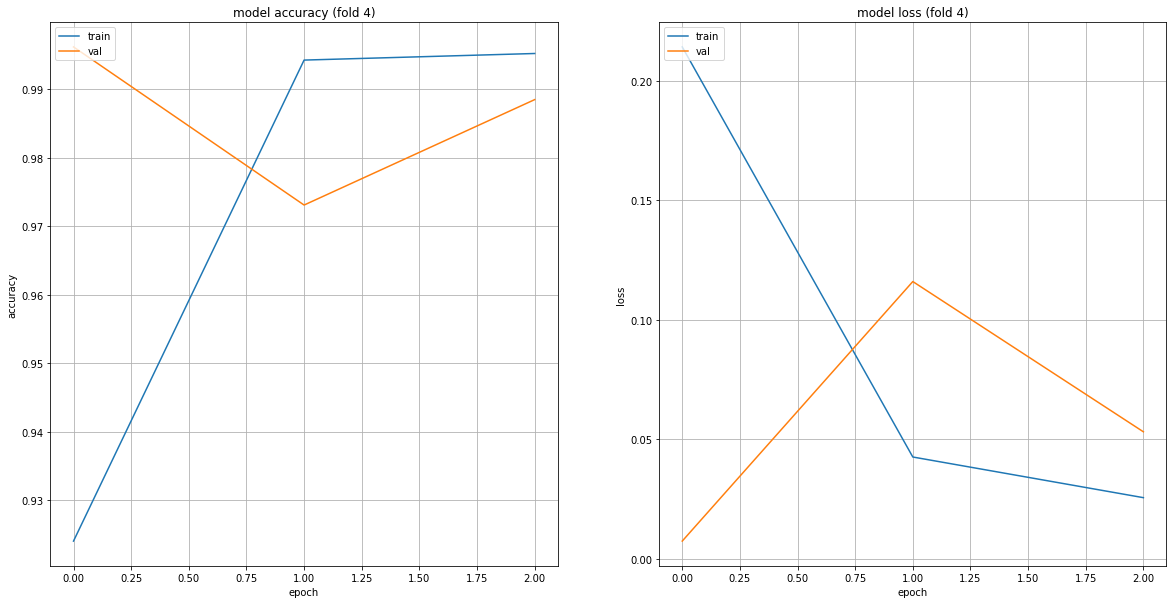

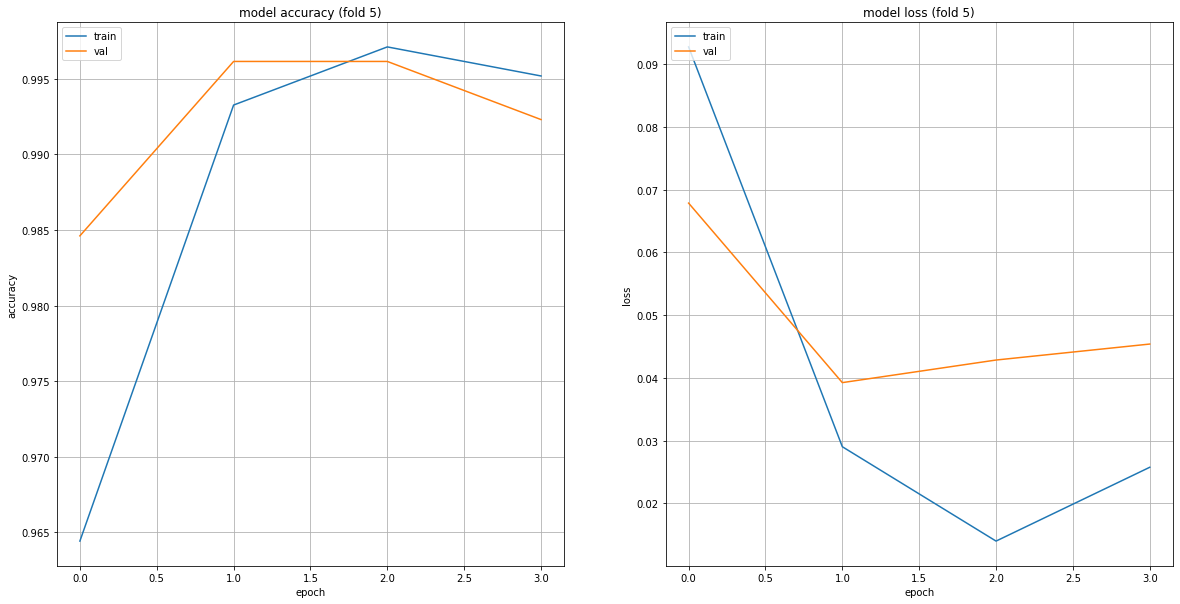

In [ ]:
from matplotlib import pyplot as plt

for i, history in enumerate(train_hists):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title(f'model accuracy (fold {i+1})')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'val'], loc='upper left')
  ax1.grid()

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title(f'model loss (fold {i+1})')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  ax2.grid()
  fig.show()

In [ ]:
for i, classification_report in enumerate(classification_reports):
  print(f"fold {i+1}")
  print(classification_report)
  print('-'*100)
  print('\n\n') 

fold 1
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       138
           1       0.96      0.99      0.98       152
           2       0.97      0.97      0.97        34

   micro avg       0.98      0.98      0.98       324
   macro avg       0.98      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324
 samples avg       0.98      0.98      0.98       324

----------------------------------------------------------------------------------------------------



fold 2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       152
           1       1.00      0.98      0.99       143
           2       1.00      1.00      1.00        29

   micro avg       0.99      0.99      0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324
 samples avg       0.99      0.99      0.99       324

------------

In [ ]:
loss = 0
acc = 0
for hist in results:
  loss += hist[0]
  acc += hist[1]

print(f"Mean loss: {round(loss/len(results), 2)}")
print(f"Mean acc: {round(acc/len(results)*100, 2)}%")

Mean loss: 0.04
Mean acc: 99.2%


In [ ]:
from sklearn.metrics import confusion_matrix

for i in range(len(predicts)):
  pred = predicts[i]
  true = tests[i]

  pred = [np.argmax(j) for j in pred]
  true = [np.argmax(j) for j in true]

  print(f"Comfusion matrix fold {i+1}:")
  print('\n')
  print(confusion_matrix(pred, true))
  print('='*50)
  print('\n')

Comfusion matrix fold 1:


[[133   0   0]
 [  5 151   1]
 [  0   1  33]]


Comfusion matrix fold 2:


[[152   3   0]
 [  0 140   0]
 [  0   0  29]]


Comfusion matrix fold 3:


[[125   0   0]
 [  0 176   0]
 [  0   1  22]]


Comfusion matrix fold 4:


[[135   0   1]
 [  0 158   0]
 [  0   0  30]]


Comfusion matrix fold 5:


[[133   1   0]
 [  0 163   0]
 [  0   0  27]]




In [ ]:
from sklearn.metrics import f1_score

mean_f1_score = 0

for i in range(len(predicts)):
  pred = predicts[i]
  true = tests[i]

  pred = [np.argmax(j) for j in pred]
  true = [np.argmax(j) for j in true]

  mean_f1_score += f1_score(true, pred, average='macro') / len(predicts)


print(f"Mean of f1-score: {round(mean_f1_score, 2)}")

Mean of f1-score: 0.99
